In [17]:
import torchvision
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchmetrics

torch.manual_seed(42)

In [18]:
transform = transforms.Compose([
    transforms.Resize((1024,768)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [19]:
PATH = "C:/Datasets/Fish Dataset"

trainData=torchvision.datasets.ImageFolder(PATH+"/train",transform=transform)
testData=torchvision.datasets.ImageFolder(PATH+"/test",transform=transform)

In [20]:
trainData.class_to_idx

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [21]:
testData.class_to_idx

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [22]:
class Net(nn.Module):
    """Some Information about Net"""
    def __init__(self):
        super(Net, self).__init__()
        self.conv=nn.Conv2d(3,4,5)
        self.pool=nn.MaxPool2d(5,5)
        self.fc1=nn.Linear(124032,4640)
        self.output=nn.Linear(4640,9)

    def forward(self, x):
        x=self.pool(F.relu(self.conv(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.softmax(self.output(x))
        return x

In [23]:
trainLoader = torch.utils.data.DataLoader(trainData, batch_size=16, shuffle=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=16, shuffle=True)

In [24]:
device = device = torch.device('cpu')
net=Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion=torch.nn.CrossEntropyLoss()


In [25]:

# loop over the dataset multiple times
metrics={
    'batch_loss':[],
    'epoch_loss':[],
    'batch_acc':[],
    'epoch_acc':[]
}

acc=torchmetrics.Accuracy()
for epoch in range(5):
    epoch_loss=0.0
    count=0
    accuracy=0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs=outputs.to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
        count+=1
        metrics['batch_acc'].append(acc(outputs.to('cpu'),labels.to('cpu')).item())
        metrics['batch_loss'].append(loss.item())
        accuracy += acc(outputs.to('cpu'), labels.to('cpu'))
    epoch_loss=epoch_loss/count
    epoch_acc=accuracy/count
    metrics['epoch_acc'].append(epoch_acc.item())
    metrics['epoch_loss'].append(epoch_loss)
    print('Loss: {}'.format(epoch_loss))
    print('Accuracy: {}'.format(accuracy))
print("Finished Training")


C:\Users\Ashwin\AppData\Local\Temp/ipykernel_11836/3306342307.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.softmax(self.output(x))


In [ ]:

# loop over the dataset multiple times
metrics2 = {
    'batch_loss': [],
    'epoch_loss': [],
    'batch_acc': [],
    'epoch_acc': []
}
net.eval()
acc = torchmetrics.Accuracy()
with torch.no_grad():
    epoch_loss = 0.0
    count = 0
    accuracy = 0.0
    for i, data in enumerate(testLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        outputs = outputs.to(device)
        epoch_loss += loss.item()
        count += 1
        metrics2['batch_acc'].append(acc(outputs.to('cpu'), labels.to('cpu')).item())
        metrics2['batch_loss'].append(loss.item())
        accuracy += acc(outputs.to('cpu'), labels.to('cpu'))
    epoch_loss = epoch_loss/count
    epoch_acc = accuracy/count
    metrics2['epoch_acc'].append(epoch_acc.item())
    metrics2['epoch_loss'].append(epoch_loss)
    print('Loss: {}'.format(epoch_loss))
    print('Accuracy: {}'.format(accuracy))
print("Finished Testing")


C:\Users\Ashwin\AppData\Local\Temp/ipykernel_11836/3306342307.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.softmax(self.output(x))


Loss: 1.6330580711364746
Accuracy: 7.999999046325684
Finished Testing


In [ ]:
metrics2['batch_acc']

[0.20000000298023224,
 0.20000000298023224,
 0.4000000059604645,
 0.20000000298023224,
 0.4000000059604645,
 0.20000000298023224,
 0.20000000298023224,
 0.4000000059604645,
 0.0,
 0.6000000238418579,
 0.6000000238418579,
 0.4000000059604645,
 0.20000000298023224,
 0.0,
 0.4000000059604645,
 0.20000000298023224,
 0.20000000298023224,
 0.4000000059604645,
 0.20000000298023224,
 0.4000000059604645,
 0.20000000298023224,
 0.4000000059604645,
 0.20000000298023224,
 0.20000000298023224,
 0.4000000059604645,
 0.6000000238418579,
 0.20000000298023224,
 0.0]

In [ ]:
import matplotlib.pyplot as plt

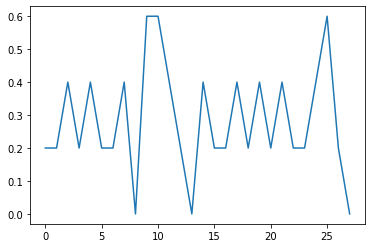

In [ ]:
plt.plot(metrics2['batch_acc'])